#**DEEP LEARNING Modeling**

###**RNN**

In [1]:
# Importing necessary libraries

import warnings
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow import keras
import tensorflow_datasets as tfds


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
cd "/content/drive/My Drive/Design Project"

/content/drive/My Drive/Design Project


In [7]:
train_data = pd.read_csv('preprocessed_train_data.csv')
test_data = pd.read_csv('preprocessed_test_data.csv')
valid_data = pd.read_csv('preprocessed_valid_data.csv')

In [8]:
# Selecting the features and target variables
X = train_data["text_preprocessed"]
y = train_data["propaganda_label"]

In [9]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50, stratify=y)

In [10]:
# Adding parameter values
num_words = 5000
oov_token = '<UNK>'
pad_type = 'post'
trunc_type = 'post'

In [11]:
# Tokenize our training data
tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token)
tokenizer.fit_on_texts(X_train)

# Get our training data word index
word_index = tokenizer.word_index

# Encode training data sentences into sequences
train_sequences = tokenizer.texts_to_sequences(X_train)

# Get max training sequence length
# maxlen = max([len(x) for x in train_sequences])
maxlen = 1000

# Pad the training sequences
train_padded = pad_sequences(train_sequences, padding=pad_type, truncating=trunc_type, maxlen=maxlen)

# Output the results of our work
print("Word index:\n", {key: word_index[key] for key in list(word_index)[:3]})
print("\nTraining sequences:\n", train_sequences[:3])
print("\nPadded training sequences:\n", train_padded[:3])
print("\nPadded training shape:", train_padded.shape)
print("Training sequences data type:", type(train_sequences))
print("Padded Training sequences data type:", type(train_padded))

Word index:
 {'<UNK>': 1, 'said': 2, 'year': 3}

Training sequences:
 [[56, 4421, 270, 84, 25, 1696, 815, 1, 1331, 4694, 1, 304, 2818, 1, 523, 509, 1, 1, 1, 2286, 23, 71, 383, 842, 1288, 97, 902, 2867, 378, 108, 67, 523, 2286, 214, 718, 50, 1, 611, 241, 10, 1, 29, 2, 2286, 45, 718, 303, 582, 15, 353, 230, 1, 1, 1, 25, 2, 71, 1148, 378, 97, 207, 464, 1, 1389, 152, 1084, 3254, 352, 1, 3235, 2451, 1, 1285, 583, 523, 319, 1, 25, 601, 1, 1, 1, 26, 471, 810, 25, 2031, 1, 608, 16, 738, 495, 97, 214, 523, 504, 523, 16, 72, 1, 1, 1157, 236, 1, 1, 2, 16, 738, 3490, 16, 482, 150, 527, 25, 2, 264, 2698, 363, 1942, 329, 1106, 1724, 3984, 329, 492, 363, 1106, 1586, 1378, 2045, 323, 1942, 93, 324, 2146, 2298, 1, 269, 371, 823, 1106, 632, 172, 632, 1378, 329, 492, 253, 223, 1615, 416, 2428, 2278, 464, 6, 2530, 34, 1, 1, 1, 1, 1, 1, 318, 4, 6, 99, 409, 516, 1633, 2663, 685, 464, 6, 1, 2286, 464, 6, 568, 1059, 97, 543, 1148, 1, 36, 141, 251, 1, 1113, 1112, 2987, 2206, 370, 207, 56, 538, 25, 38, 2217, 72

In [12]:
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, padding=pad_type, truncating=trunc_type, maxlen=maxlen)

print("Testing sequences:\n", test_sequences[:3])
print("\nPadded testing sequences:\n", test_padded[:3])
print("\nPadded testing shape:",test_padded.shape)

Testing sequences:
 [[547, 3934, 211, 2906, 240, 305, 2442, 1, 3744, 4273, 567, 110, 39, 1771, 547, 3934, 6, 848, 601, 3470, 1, 18, 2716, 331, 1, 2325, 432, 331, 676, 158, 704, 4200, 3250, 851, 2555, 388, 200, 47, 2170, 230, 599, 209, 214, 119, 114, 217, 331, 98, 800, 1164, 1, 3419, 773, 14, 1, 18, 331, 148, 1455, 56, 39, 1, 18, 848, 1, 211, 2688, 659, 941, 1], [113, 281, 42, 1, 297, 1, 1, 123, 177, 2463, 443, 29, 432, 737, 872, 168, 4, 14, 4318, 1049, 1638, 768, 102, 256, 2463, 1972, 434, 281, 443, 624, 4145, 1124, 207, 102, 109, 2463, 2707, 1380, 304, 604, 2333, 64, 6, 1, 554, 1638, 768, 2463, 1972, 66, 11, 169, 5, 281, 1, 1, 1, 1, 58, 2972, 1194, 168, 124, 1, 9, 3869, 1, 1, 238, 2463, 1, 147, 1, 434, 281, 443, 624, 432, 225, 974, 296, 556, 1, 2162, 109, 544, 246, 1967, 42, 1, 297, 1, 3028, 115, 1, 281, 1773, 2463, 4843, 31, 1, 123, 225, 1, 13, 3, 54, 2085, 1434, 238, 336, 29, 177, 2463, 443, 69, 1, 562, 1, 2768, 1, 1, 2463, 1147, 1, 1, 1, 109, 3858, 2463, 711, 764, 562, 2043, 2962, 

In [13]:
train_labels = np.array(y_train)
test_labels = np.array(y_test)

In [14]:
# Recode class labels from 1 and -1 to 0 and 1

train_labels[train_labels == -1] = 0
test_labels[test_labels == -1] = 0

In [15]:
train_labels

array([0, 1, 0, ..., 0, 0, 0])

In [16]:
test_labels

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
from sklearn.utils import class_weight
import numpy as np

# Get class weights from training data
class_weights = class_weight.compute_class_weight(class_weight = 'balanced', classes =np.unique(train_labels), y= train_labels)

# Create a dictionary to map class index to weight
class_weights_dict = dict(enumerate(class_weights))

print(class_weights_dict)

{0: 0.5629032888819365, 1: 4.4743549891202985}


In [ ]:
from tensorflow.keras.metrics import AUC
import keras.backend as K
from tensorflow.keras.callbacks import LearningRateScheduler

def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

model = keras.models.Sequential([
    keras.layers.Embedding(10000, 64), # Reduced embedding dimension
    keras.layers.SimpleRNN(256, return_sequences=True),
    keras.layers.SimpleRNN(256, return_sequences=False),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy", AUC(), get_f1])

# Defining a function to adjust the learning rate
def lr_schedule(epoch, lr):
   if epoch > 0 and epoch % 10 == 0:
       return lr * 0.1
   return lr

# Adding early stopping callback
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
# Create a LearningRateScheduler callback
lr_callback = LearningRateScheduler(lr_schedule)

history2 = model.fit(train_padded, train_labels, epochs=10, validation_data=(test_padded, test_labels), callbacks=[early_stop, lr_callback], class_weight=class_weights_dict)

Epoch 1/10
900/900 [==============================] - 2635s 3s/step - loss: 0.7097 - accuracy: 0.5285 - auc: 0.5011 - get_f1: 0.0955 - val_loss: 0.7340 - val_accuracy: 0.1117 - val_auc: 0.5000 - val_get_f1: 0.1967 - lr: 0.0010
Epoch 2/10
900/900 [==============================] - 2669s 3s/step - loss: 0.7025 - accuracy: 0.4895 - auc: 0.4999 - get_f1: 0.1011 - val_loss: 0.5143 - val_accuracy: 0.8883 - val_auc: 0.5000 - val_get_f1: 0.0000e+00 - lr: 0.0010
Epoch 3/10
900/900 [==============================] - 2704s 3s/step - loss: 0.7021 - accuracy: 0.5026 - auc: 0.5051 - get_f1: 0.0987 - val_loss: 0.5562 - val_accuracy: 0.8879 - val_auc: 0.4998 - val_get_f1: 0.0000e+00 - lr: 0.0010
Epoch 4/10
900/900 [==============================] - 2678s 3s/step - loss: 0.7030 - accuracy: 0.4936 - auc: 0.4983 - get_f1: 0.0992 - val_loss: 0.9172 - val_accuracy: 0.1166 - val_auc: 0.5278 - val_get_f1: 0.1974 - lr: 0.0010
Epoch 5/10
900/900 [==============================] - 2668s 3s/step - loss: 0.7025 -

<ipython-input-18-79b221061a01>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


225/225 [==============================] - 163s 726ms/step
Confusion Matrix:
[[ 397 5997]
 [  33  771]]


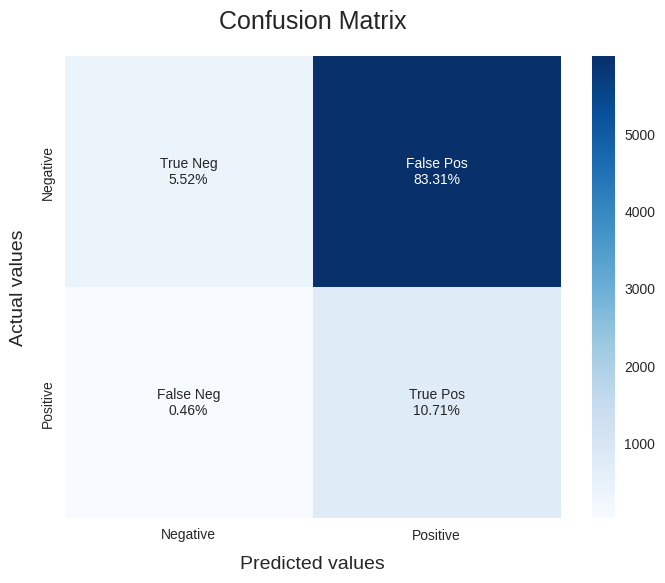

Classification Report:
               precision    recall  f1-score   support

          -1       0.92      0.06      0.12      6394
           1       0.11      0.96      0.20       804

    accuracy                           0.16      7198
   macro avg       0.52      0.51      0.16      7198
weighted avg       0.83      0.16      0.13      7198

ROC AUC Score: 0.5415968328516942


<ipython-input-18-79b221061a01>:52: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--' , color='blue')


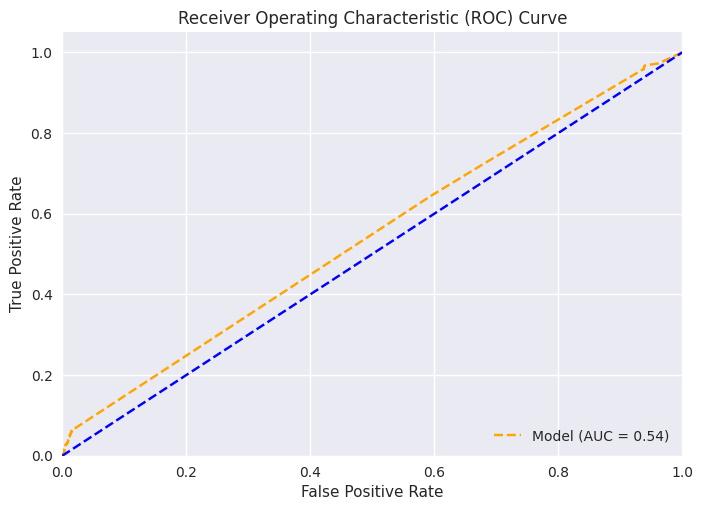

In [ ]:
# Making predictions on the training data

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

predictions = model.predict(test_padded)
predicted_labels = np.round(predictions)

# Recode class labels from 1 and 0 to -1 and 1
test_labels[test_labels == 0] = -1
predicted_labels[predicted_labels == 0] = -1

# Generate the confusion matrix
confusion_mat = confusion_matrix(test_labels, predicted_labels)
print("Confusion Matrix:")
print(confusion_mat)

# Computing and plotting the Confusion matrix
cf_matrix = confusion_matrix(test_labels, predicted_labels)

categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

plt.figure(figsize=(8, 6)) # Create a new figure for confusion matrix
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

# Generate the classification report
class_report = classification_report(test_labels, predicted_labels)
print("Classification Report:\n", class_report)

# Calculate and print the ROC AUC score
auc_score = roc_auc_score(test_labels, predictions)
print("ROC AUC Score:", auc_score)

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(test_labels, predictions)
sns.set_style("darkgrid")
plt.figure()
plt.plot(fpr, tpr, linestyle='--',color='orange',label=f'Model (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--' , color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<ipython-input-19-9a585310bccf>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


161/161 [==============================] - 145s 905ms/step
Confusion Matrix:
[[ 422 4128]
 [  43  532]]


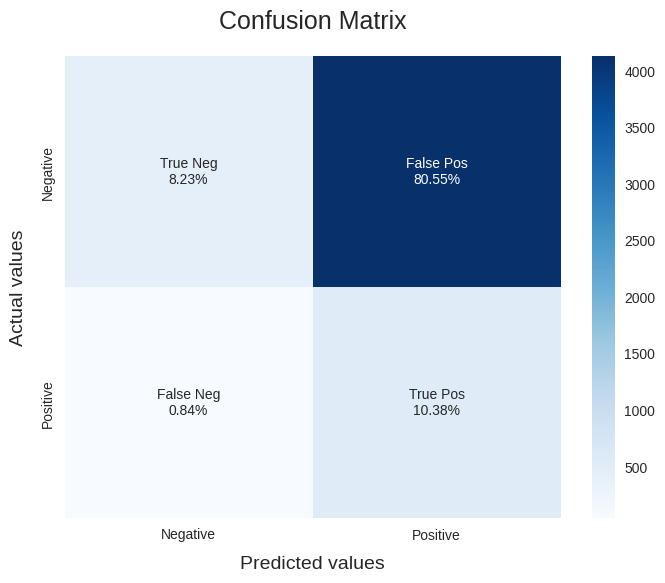

Classification Report:
               precision    recall  f1-score   support

          -1       0.91      0.09      0.17      4550
           1       0.11      0.93      0.20       575

    accuracy                           0.19      5125
   macro avg       0.51      0.51      0.19      5125
weighted avg       0.82      0.19      0.17      5125

ROC AUC Score: 0.5384647873865266


<ipython-input-19-9a585310bccf>:59: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--' , color='blue')


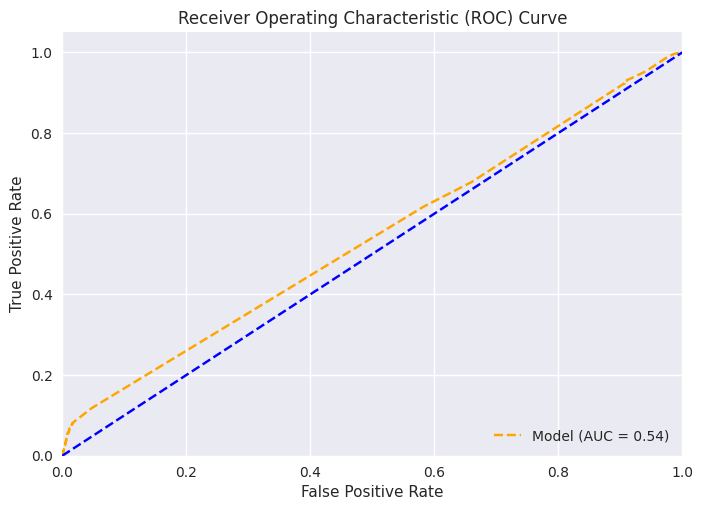

In [ ]:
# Make predictions on the Validation data using the model

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
plt.style.use('seaborn')

test_sequences = tokenizer.texts_to_sequences(valid_data.text_preprocessed)
test_padded = pad_sequences(test_sequences, padding=pad_type, truncating=trunc_type, maxlen=maxlen)


predictions = model.predict(test_padded)
predicted_labels = np.round(predictions)

# Changing the label name
y_test = valid_data.propaganda_label
test_labels = np.array(y_test)

# Recode class labels from 1 and 0 to -1 and 1
test_labels[test_labels == 0] = -1
predicted_labels[predicted_labels == 0] = -1

# Generate the confusion matrix
confusion_mat = confusion_matrix(test_labels, predicted_labels)
print("Confusion Matrix:")
print(confusion_mat)

# Computing and plotting the Confusion matrix
cf_matrix = confusion_matrix(test_labels, predicted_labels)

categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

plt.figure(figsize=(8, 6)) # Create a new figure for confusion matrix
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

# Generate the classification report
class_report = classification_report(test_labels, predicted_labels)
print("Classification Report:\n", class_report)

# Calculate and print the ROC AUC score
auc_score = roc_auc_score(test_labels, predictions)
print("ROC AUC Score:", auc_score)

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(test_labels, predictions)
sns.set_style("darkgrid")
plt.figure()
plt.plot(fpr, tpr, linestyle='--',color='orange',label=f'Model (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--' , color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

318/318 [==============================] - 236s 744ms/step
Confusion Matrix:
[[ 783 8236]
 [  92 1048]]


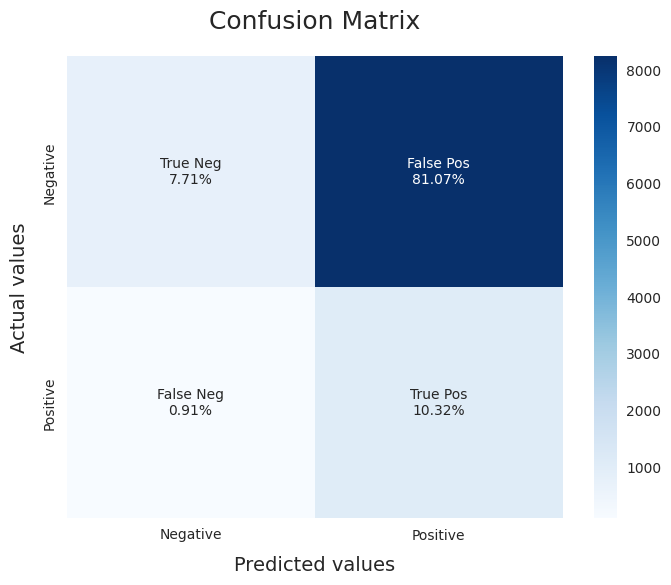

Classification Report:
               precision    recall  f1-score   support

          -1       0.89      0.09      0.16      9019
           1       0.11      0.92      0.20      1140

    accuracy                           0.18     10159
   macro avg       0.50      0.50      0.18     10159
weighted avg       0.81      0.18      0.16     10159

ROC AUC Score: 0.5472507844064092


<ipython-input-20-c99215d7e8f2>:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--' , color='blue')


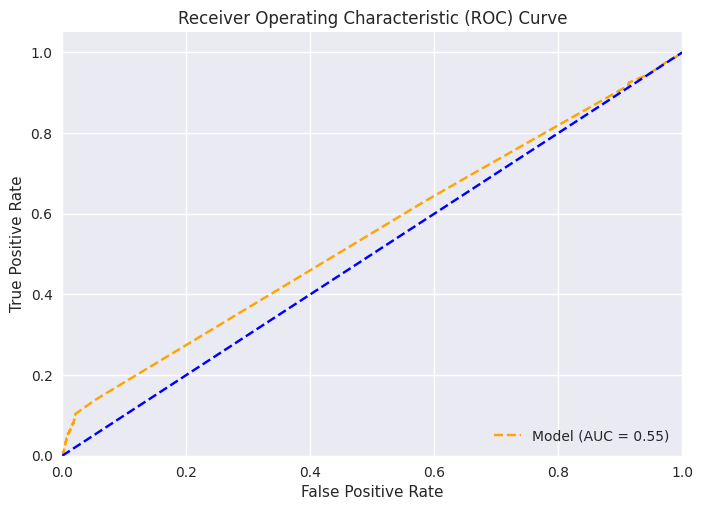

In [ ]:
# Make predictions on the Test data using the model

test_sequences = tokenizer.texts_to_sequences(test_data.text_preprocessed)
test_padded = pad_sequences(test_sequences, padding=pad_type, truncating=trunc_type, maxlen=maxlen)

predictions = model.predict(test_padded)
predicted_labels = np.round(predictions)

# Changing the label name
y_test = test_data.propaganda_label
test_labels = np.array(y_test)

# Recode class labels from 1 and 0 to -1 and 1
test_labels[test_labels == 0] = -1
predicted_labels[predicted_labels == 0] = -1

# Generate the confusion matrix
confusion_mat = confusion_matrix(test_labels, predicted_labels)
print("Confusion Matrix:")
print(confusion_mat)

# Computing and plotting the Confusion matrix
cf_matrix = confusion_matrix(test_labels, predicted_labels)

categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

plt.figure(figsize=(8, 6)) # Create a new figure for confusion matrix
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

# Generate the classification report
class_report = classification_report(test_labels, predicted_labels)
print("Classification Report:\n", class_report)

# Calculate and print the ROC AUC score
auc_score = roc_auc_score(test_labels, predictions)
print("ROC AUC Score:", auc_score)

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(test_labels, predictions)
sns.set_style("darkgrid")
plt.figure()
plt.plot(fpr, tpr, linestyle='--',color='orange',label=f'Model (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--' , color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [3]:
# Using Prettytable for displaying the observations

from prettytable import PrettyTable

table = PrettyTable()

table.field_names = ["S.No", "Model", "Hyper Parameters", "Accuracy", "F1 - Negative Class(-1)", "F1 - Positive Class(1)", "AUC Score"]

print(table)

+------+-------+------------------+----------+-------------------------+------------------------+-----------+
| S.No | Model | Hyper Parameters | Accuracy | F1 - Negative Class(-1) | F1 - Positive Class(1) | AUC Score |
+------+-------+------------------+----------+-------------------------+------------------------+-----------+
+------+-------+------------------+----------+-------------------------+------------------------+-----------+


In [4]:
## Adding rows to the table

table.add_row([2, "Recurrent Neural Network", "Embedding Dim: 200, SimpleRNN: 100, Optimizer= Adam, Loss: Binary cross-entropy", "0.92", "0.92", "0.61","0.90"])

In [5]:
print(table)

+------+--------------------------+---------------------------------------------------------------------------------+----------+-------------------------+------------------------+-----------+
| S.No |          Model           |                                 Hyper Parameters                                | Accuracy | F1 - Negative Class(-1) | F1 - Positive Class(1) | AUC Score |
+------+--------------------------+---------------------------------------------------------------------------------+----------+-------------------------+------------------------+-----------+
|  2   | Recurrent Neural Network | Embedding Dim: 200, SimpleRNN: 100, Optimizer= Adam, Loss: Binary cross-entropy |   0.92   |           0.92          |          0.61          |    0.90   |
+------+--------------------------+---------------------------------------------------------------------------------+----------+-------------------------+------------------------+-----------+
